In [1]:
!pip install opencv-python

# Libraries

In [2]:
# Display
import matplotlib.pyplot as plt
# Directory
import cv2
import os

# Convert images to array of floats
import numpy as np


# Images Dataset

In [3]:
# get directory
cwd = os.getcwd()
path = cwd + "/cats"
images = []

# get all images
for image in os.listdir(path):
    image_path = os.path.join(path, image)
    img = cv2.imread(image_path)
    if(image is not None):
        images.append(img)

In [4]:
images[0].shape

(64, 64, 3)

# Preprocess and Display

In [9]:
# Preprocess the data
# Gans work better with [-1, 1] so we can use tanh function, so normalize to that

def preprocess(img):
    img = (img.astype(np.float32) - 127.5)/ 127.5
    return img

#train = images.map(lambda x: preprocess(x))
train = list(map(preprocess, images))

# Display
def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """


    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow((images[i].astype(as_type) + 1) / 2, cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()


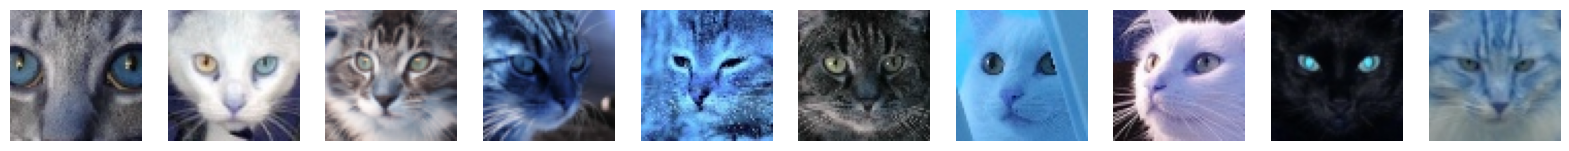

In [10]:
display(train[:10])

In [11]:
print(len(train))
print(train[0].shape)

29843
(64, 64, 3)


In [13]:
# np.savetxt only works with 2d array's our data is a 4d array (29843, 64, 64, 3)
# So save as data slices
with open("text_data/cat_data.txt", 'w') as f:
    for train_slice in train:
        for slice_slice in train_slice:
            np.savetxt(f, slice_slice)

In [14]:
# Make sure loading works
loaded_data = np.loadtxt("text_data/cat_data.txt")
loaded_data = loaded_data.reshape((29843, 64, 64, 3))

29843
(64, 64, 3)


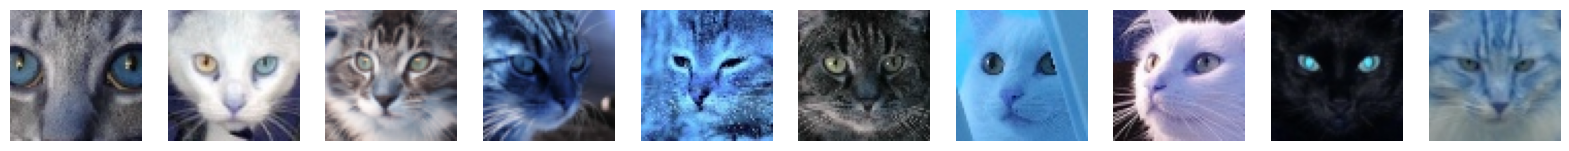

In [15]:
print(len(loaded_data))
print(loaded_data[0].shape)
display(loaded_data[:10])